In [6]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
dataset = 'dev_dataset'

In [9]:
os.listdir(dataset)

['1.jpg',
 '10.jpg',
 '11.jpg',
 '11_duplicate.jpg',
 '11_modification.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '15_modification.jpg',
 '16.jpg',
 '1_duplicate.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '4_similar.jpg',
 '6.jpg',
 '6_similar.jpg',
 '8.jpg']

In [10]:
class ImageCategorizer:
    
    def __init__(self, path, hash_size=8, quantize=16):
        self.image_path = path
        self.PilImage = Image.open(path)
        self.np_array = np.asarray(self.PilImage)
        self.hash_size = hash_size
        self.quantize = quantize    

    @property
    def avg_hash(self):
        """
        return binary hash of image using average of pixels
        
        Arguments:
        hash_size - size of downsize image to create hash
        
        Return:
        bin_hash - numpy array with shape (hash_size**2, )
        """
        image = self.PilImage.convert("L").resize((self.hash_size, self.hash_size), Image.ANTIALIAS)
        pixels = np.asarray(image)
        avg = pixels.mean()
        bin_hash = pixels > avg
        return bin_hash.ravel()
    
    @property
    def hist_hash(self):
        array = np.histogram(self.np_array.flatten(),bins=self.quantize)[0]
        #x = np.histogram(self.np_array.flatten(),bins=self.quantize)[1]
        return array
        #threshhold = np.median(array)
        #return np.where(array>threshhold,True,False)
    
    def __eq__(self, other):
        """
        Compare all pixels of image
        
        Arguments:
        other - ImageCategorizer object
        
        Returns:
        Result of compare
        """
        return np.array_equal(self.np_array, other.np_array)
    
    def compare_hist_hash(self, other):
        
        if np.count_nonzero(rankdata(hash0.hist_hash) == rankdata(hash0_2.hist_hash)) >= self.quantize//2:
            return True
        else:
            return False
    
    def compare_avg_hash(self, other):
        """
        Compare hash of image
        
        Arguments:
        other - ImageCategorizer object
        
        Returns:
        Result of compare
        """
        return np.count_nonzero(self.avg_hash != other.avg_hash)
    
                               
    def __str__(self):
        """
        Represent '1101' instead of [True,True,False,True]
        """
        return ''.join([pixel.astype('int').astype('str') for pixel in self.avg_hash.ravel()])

In [6]:
for i in os.listdir(dataset):
    im = ImageCategorizer(os.path.join(dataset,i))
    print(i,end=' '*(len(max(os.listdir(dataset),key=lambda x: len(x)))-len(i)+1))
    print(im)
    print('')

1.jpg               0001110001001000011000001111001001111010000110000000110000000000

10.jpg              1111111111111111011000110000001100000011010001110000011000000110

11.jpg              0001100010011101011100101111001101011101010011101100010100000000

11_duplicate.jpg    0001100010011101011100101111001101011101010011101100010100000000

11_modification.jpg 0001100010011101011100101111001101011101010011101100010100000000

12.jpg              0100010011011001110001001111011011111101111110000111010001000000

13.jpg              1111111111111111100000010000000110001111110011110000111110001111

14.jpg              1111111100111111001111110000000000000000000000000000000010000000

15.jpg              1110000000000011001000111100001110000011000001111000111111011111

15_modification.jpg 1110000000000011001000111100001110000011000001111000111111011111

16.jpg              1110000011100000111000001110000011111000111100001110000011100000

1_duplicate.jpg     0001110001001000011000001111001001

In [153]:
%%time
def avg_hash(img):
        """
        return binary hash of image using average of pixels
        
        Arguments:
        hash_size - size of downsize image to create hash
        
        Return:
        bin_hash - numpy array with shape (hash_size**2, )
        """
        image = img.convert("L").resize((8, 8), Image.ANTIALIAS)
        pixels = np.asarray(image)
        avg = pixels.mean()
        bin_hash = pixels > avg
        return bin_hash.ravel()
    
def compare_avg_hash(one, other):
        """
        Compare hash of image
        
        Arguments:
        other - ImageCategorizer object
        
        Returns:
        Result of compare
        """
        return np.count_nonzero(avg_hash(one) != avg_hash(other))
    
def hist_hash(img):
        return np.histogram(np.asarray(img).flatten(),bins=16)[0]
        
all_images = os.listdir(dataset)
for filename in all_images:
    current = Image.open(os.path.join(dataset,filename))
    for other_file in all_images:
        compare = Image.open(os.path.join(dataset,other_file))
        if filename == other_file:
            continue
        elif np.array_equal(current,compare):
            print(filename, other_file)
        elif compare_avg_hash(current,compare) == 0:
            print(filename, other_file)
        elif np.array_equal(findpeaks(hist_hash(current)),findpeaks(hist_hash(compare))): # \
                #and np.array_equal(np.argsort(findpeaks(hist_hash(current))),np.argsort(findpeaks(hist_hash(compare)))):
            print(filename,  other_file)
    all_images.remove(filename)

1.jpg 1_duplicate.jpg
11.jpg 11_duplicate.jpg
11.jpg 11_modification.jpg
11_modification.jpg 11_duplicate.jpg
15.jpg 15_modification.jpg
4.jpg 4_similar.jpg
6.jpg 6_similar.jpg
Wall time: 1min 50s


In [30]:
%%time
hash0 = ImageCategorizer(os.path.join(dataset,'4.jpg'))
hash0_2 = ImageCategorizer(os.path.join(dataset,'4_similar.jpg'))
hash1 = ImageCategorizer(os.path.join(dataset,'16.jpg'))

hash1 = ImageCategorizer(os.path.join(dataset,'11.jpg'))
hash1_2 = ImageCategorizer(os.path.join(dataset,'11_modification.jpg'))

Wall time: 688 ms


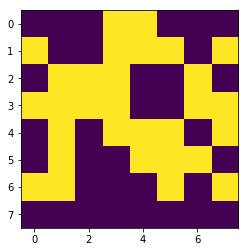

In [36]:
plt.imshow(np.reshape(hash1.avg_hash,(8,8)))

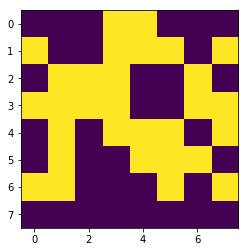

In [37]:
plt.imshow(np.reshape(hash1_2.avg_hash,(8,8)))

(array([  77680.,   73328.,  544363., 1092533.,  535150.,   83604.,
         89112.,   96841.,   85807.,  116842.,  147635.,  125824.,
        100679.,   46996.,   23663.,   15261.]), array([  0.    ,  15.9375,  31.875 ,  47.8125,  63.75  ,  79.6875,
        95.625 , 111.5625, 127.5   , 143.4375, 159.375 , 175.3125,
       191.25  , 207.1875, 223.125 , 239.0625, 255.    ]), <a list of 16 Patch objects>)
1092533.0
15261.0
92976.5


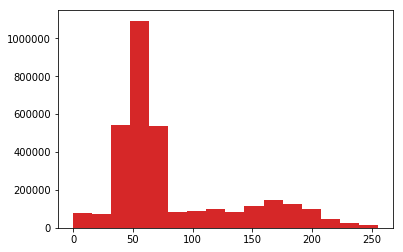

In [13]:
print(plt.hist(hash0.np_array.flatten(),bins=16))
print(np.max(plt.hist(hash0.np_array.flatten(),bins=16)[0]))
print(np.min(plt.hist(hash0.np_array.flatten(),bins=16)[0]))
print(np.median(plt.hist(hash0.np_array.flatten(),bins=16)[0]))

(array([6.164900e+06, 4.059030e+05, 9.389950e+05, 1.043491e+06,
       9.362750e+05, 7.104840e+05, 5.061140e+05, 3.286620e+05,
       1.651860e+05, 5.834300e+04, 1.789200e+04, 6.451000e+03,
       3.047000e+03, 1.926000e+03, 1.109000e+03, 8.220000e+02]), array([  0.    ,  15.9375,  31.875 ,  47.8125,  63.75  ,  79.6875,
        95.625 , 111.5625, 127.5   , 143.4375, 159.375 , 175.3125,
       191.25  , 207.1875, 223.125 , 239.0625, 255.    ]), <a list of 16 Patch objects>)
6164900.0
822.0
246924.0


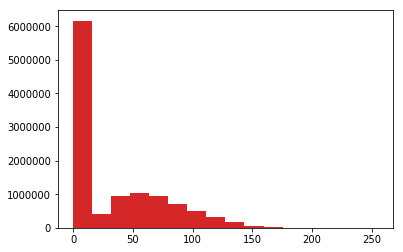

In [14]:
print(plt.hist(hash1.np_array.flatten(),bins=16))
print(np.max(plt.hist(hash1.np_array.flatten(),bins=16)[0]))
print(np.min(plt.hist(hash1.np_array.flatten(),bins=16)[0]))
print(np.median(plt.hist(hash1.np_array.flatten(),bins=16)[0]))

(array([ 82408.,  62189., 607302., 873672., 585120., 209165.,  88208.,
        91405.,  76749., 101446., 131954., 121208., 106364.,  59838.,
        35466.,  22824.]), array([  0.    ,  15.9375,  31.875 ,  47.8125,  63.75  ,  79.6875,
        95.625 , 111.5625, 127.5   , 143.4375, 159.375 , 175.3125,
       191.25  , 207.1875, 223.125 , 239.0625, 255.    ]), <a list of 16 Patch objects>)
873672.0
22824.0
96425.5


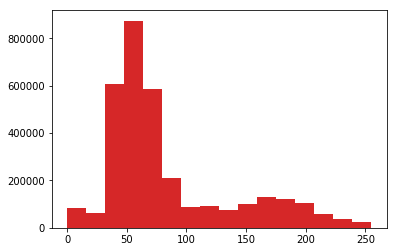

In [15]:
print(plt.hist(hash0_2.np_array.flatten(),bins=16))
print(np.max(plt.hist(hash0_2.np_array.flatten(),bins=16)[0]))
print(np.min(plt.hist(hash0_2.np_array.flatten(),bins=16)[0]))
print(np.median(plt.hist(hash0_2.np_array.flatten(),bins=16)[0]))

In [16]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

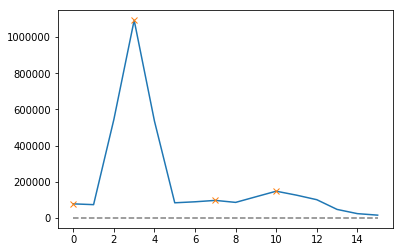

In [23]:
x = hash0.hist_hash
peaks = findpeaks(x)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

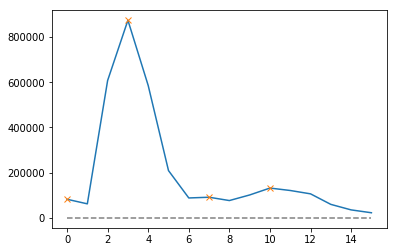

In [24]:
x = hash0_2.hist_hash
peaks = findpeaks(x)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

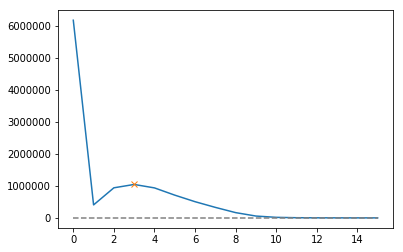

In [25]:
x = hash1.hist_hash
peaks, _ = find_peaks(x)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [2]:
def findpeaks(y):
    """
    Generate the indices of the peaks in a data line

    :param y: :class:`numpy.ndarray` histogram values
    :return: :class:`numpy.ndarray` the index values of the ridges in the line
    """

    dy = np.diff(y)

    dy_2 = np.array(np.where(dy == 0))
    if dy.size == dy_2.size:
        return []

    dy_a1 = np.append(dy, [0])
    dy_a2 = np.append([1], dy)

    index_a1 = np.array((dy_a1 <= 0).nonzero())
    index_a2 = np.array((dy_a2 > 0).nonzero())

    index = np.intersect1d(index_a1, index_a2)
    if len(index) == 0:
        return index

    if index[0] == 0:
        if dy[0] == 0:
            nonzero_index = (dy != 0).nonzero()

            if dy[nonzero_index[0][0]] > 0:
                index = index[1:]

    if index[-1] == np.size(y):
        if dy[-1] == 0:

            nonzero_index = (dy != 0).nonzero()
            if dy[nonzero_index[0][-1]] < 0:
                index = index[0:-2]

    # Get the values that are at the start of plateaus, or are peaks
    index_v = np.append([0], np.diff(index))
    index = np.compress(index_v != 1, index)

    return index